## Homework 9 - Machine Learning with Python
### Author: Val Wong - vmw170030
#### 4/25/2021

---
### Step 1 - Loading the Data
Data on shots taken during the 2014-2015 season, who took the shot, where on the floor was the shot taken from, who was the nearest defender, how far away was the nearest defender, time on the shot clock, and much more. The column titles are generally self-explanatory.

Useful for evaluating who the best shooter is, who the best defender is, the hot-hand hypothesis, etc. Scraped from NBA’s REST API.

Source: https://www.kaggle.com/dansbecker/nba-shot-logs

In [1]:
import pandas as pd
df = pd.read_csv("nba_shot_logs.csv")

---
### Step 2 - Data Cleaning
In this data set, the column ‘Shot_Clock’ contains NAs, which is replaced with either the mean of the column. Lastly, we factor columns that need to be factored to levels.

In [2]:
import numpy as np
shotlog_mean = np.mean(df.SHOT_CLOCK)
df.SHOT_CLOCK.fillna(shotlog_mean, inplace=True)
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

In [3]:
df.SHOT_RESULT = df.SHOT_RESULT.astype('category') # factor()

---
### Step 3 - Data Exploration

In [4]:
print('\nDimensions of the data frame:', df.shape) # numofrows/cols


Dimensions of the data frame: (128069, 21)


In [5]:
print(df.columns) # names

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')


In [6]:
print(df.info()) # str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   GAME_ID                     128069 non-null  int64   
 1   MATCHUP                     128069 non-null  object  
 2   LOCATION                    128069 non-null  object  
 3   W                           128069 non-null  object  
 4   FINAL_MARGIN                128069 non-null  int64   
 5   SHOT_NUMBER                 128069 non-null  int64   
 6   PERIOD                      128069 non-null  int64   
 7   GAME_CLOCK                  128069 non-null  object  
 8   SHOT_CLOCK                  128069 non-null  float64 
 9   DRIBBLES                    128069 non-null  int64   
 10  TOUCH_TIME                  128069 non-null  float64 
 11  SHOT_DIST                   128069 non-null  float64 
 12  PTS_TYPE                    128069 non-null  int64   
 13 

In [7]:
df.describe() # summary

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.636611,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [8]:
print(df.head()) # head()

    GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  PTS_TYPE  \
0       1       1:09   10.800000         2  ...        7.7         2   
1       1       0:14    3.400000         0  ...       28.2         3   
2       1       0:00   12.453344         3  ...       10.1         2   
3       2      11:47   10.300000         2  ...       17.2         2   
4       2      10:34   10.900000         2  ...        3.7         2   

   SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  \
0     

In [9]:
print(df.tail()) # tail()

         GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  \
128064  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128065  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128066  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128067  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   
128068  21400006  OCT 29, 2014 - BKN @ BOS        A  L           -16   

        SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  \
128064            5       3       1:52   18.300000         5  ...        8.7   
128065            6       4      11:28   19.800000         4  ...        0.6   
128066            7       4      11:10   23.000000         2  ...       16.9   
128067            8       4       2:37    9.100000         4  ...       18.3   
128068            9       4       0:12   12.453344         5  ...        5.1   

        PTS_TYPE  SHOT_RESULT  CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  \
128064  

**Data Exploration - Miscellaneous**

In [10]:
print("Farthest shot distance: ", np.max(df.SHOT_DIST))
print("Total Made Shots:", (df['SHOT_RESULT'] == 'made').sum())
print("Total Missed Shots:", (df['SHOT_RESULT'] == 'missed').sum())

Farthest shot distance:  47.2
Total Made Shots: 57905
Total Missed Shots: 70164


**Data Visualization**

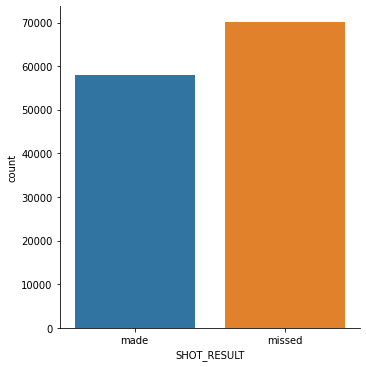

In [11]:
import seaborn as sb
sb.catplot(x="SHOT_RESULT", kind="count", data=df)

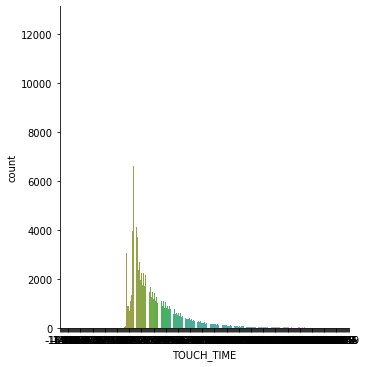

In [12]:
sb.catplot(x="TOUCH_TIME", kind="count", data=df)

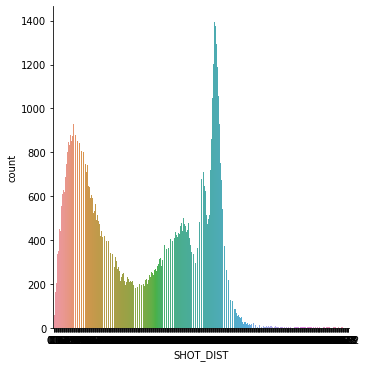

In [13]:
sb.catplot(x="SHOT_DIST", kind="count", data=df)

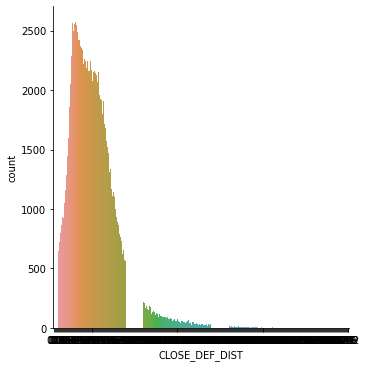

In [14]:
sb.catplot(x="CLOSE_DEF_DIST", kind="count", data=df)

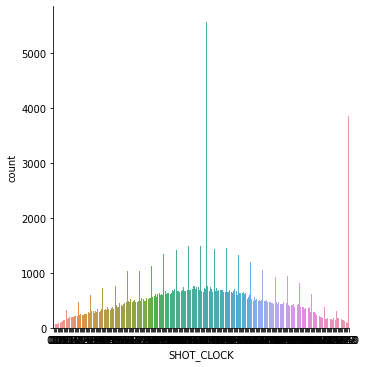

In [15]:
sb.catplot(x="SHOT_CLOCK", kind="count", data=df)

### Step 4 - Dividing into Train and Test sets

Divide data randomly. 75% into Train and 25% into Test.

In [16]:
from sklearn.model_selection import train_test_split

X = df[["DRIBBLES", "SHOT_DIST", "CLOSE_DEF_DIST", "SHOT_CLOCK"]]
y = df[["SHOT_RESULT"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (96051, 4)
test size: (32018, 4)


### Step 5.0 - Logistic Regression
Logistic Regression Model exhibits good probabilistic output and is computationally inexpensive. The simplicity of Logistic regression and effectiveness only works optimally on linear data. With However, it can
prove to have poor performance on nonlinear data.

In [17]:
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression()
glm.fit(X_train, y_train.values.ravel()) # glm.fit(X_train, y_train) - DataConversionWarning
glm.score(X_train, y_train)

0.6089993857429907

In [18]:
glm_pred = glm.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred))

from sklearn.metrics import accuracy_score

print('Accuracy score: ', accuracy_score(y_test, glm_pred))

              precision    recall  f1-score   support

        made       0.58      0.47      0.52     14510
      missed       0.62      0.72      0.67     17508

    accuracy                           0.61     32018
   macro avg       0.60      0.60      0.59     32018
weighted avg       0.60      0.61      0.60     32018

Accuracy score:  0.6077831219938784


In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, glm_pred)

array([[ 6865,  7645],
       [ 4913, 12595]], dtype=int64)

### Step 5.1 - Naive Bayes Model
I selected the Naive Model for its real-time predicting as it can prove to be very fast in terms of performance but is weak when predictors are not independent (naive assumption). I, also, selected Naive Bayes as to act
as a good baseline in comparing performances of other classification algorithms.

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train.values.ravel())
nb.score(X_train, y_train)

0.5930703480442682

In [21]:
nb_pred = nb.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, nb_pred))

from sklearn.metrics import accuracy_score

print('Accuracy score: ', accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

        made       0.56      0.52      0.54     14510
      missed       0.62      0.65      0.64     17508

    accuracy                           0.59     32018
   macro avg       0.59      0.59      0.59     32018
weighted avg       0.59      0.59      0.59     32018

Accuracy score:  0.594884127678181


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, nb_pred)

array([[ 7597,  6913],
       [ 6058, 11450]], dtype=int64)

### Step 5.2 - kNN Classification Model
I selected the kNN Classification Model for its advantages in making no assumptions about the shape of the data. However, because I am using it with high dimensions, it could possibly suffer from poor performance.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [24]:
knn_pred = knn.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))

from sklearn.metrics import accuracy_score

print('Accuracy score: ', accuracy_score(y_test, knn_pred))

              precision    recall  f1-score   support

        made       0.49      0.49      0.49     14510
      missed       0.57      0.57      0.57     17508

    accuracy                           0.53     32018
   macro avg       0.53      0.53      0.53     32018
weighted avg       0.53      0.53      0.53     32018

Accuracy score:  0.5342932100693359


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn_pred)

array([[7118, 7392],
       [7519, 9989]], dtype=int64)

### Step 6 - Results Analysis

**Python:**
- **Logistic Regression Accuracy score:**  0.6077831219938784
- **Naive Bayes Accuracy score:**  0.594884127678181
- **kNN Classification Accuracy score:**  0.5342932100693359

**R:**
- **Logistic Regression Accuracy score:** 0.6095 
- **Naive Bayes Accuracy score:** 0.5937 
- **kNN Classification Accuracy score:** 0.5438


Overall, it seems that R implementation of the algorithms performed better than their R counterpart, except for Naive Bayes which achieved a better accuracy score (but only by hundredth). Logistic Regression ranked first, Naive Bayes performed second-best, and kNN performed worst of the three. This ranking was exhibited in the R implementation as well which further strengthens my result analysis in the project. In running the algorithms, it was a lot faster in doing so when compared to R. Especially, the kNN algorithm which seemed like it was instant in Python but took a while in R. 

In coding the Python version of these algorithms, it seemed a lot simpler to implement as it required less commands to do so. Knowing what library what function comes from is more vital in doing Machine Learning in Python as it does in R. After that, however, it's a lot simpler to create the model and predict as it they only differ in the model function. I, also, had an impression that a lot of the python counterparts felt a bit more updated. I did run into some trouble when I was attempting to select specific columns and passing Train/Test sets into some functions (which I had to ravel()). But this roots from being unfamiliar with functions and their nature (parameters and return types). Overall, I am still very interested in the Python version of Machine Learning as Python has been one of my favorite programming languages to get better at.